In [1]:
import sys

sys.path.append('../tflow/keras-yolo3')

import cv2
import os
import time
import argparse
import numpy as np
import matplotlib.pyplot as plt
from yolo import YOLO
from PIL import Image

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
# dynamically grow GPU memory
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/choppy/anac

In [2]:
FLAGS = {}

# FLAGS['model_path'] = '../tflow/keras-yolo3/logs/trained_weights_final.h5'
FLAGS['model_path'] = '../tflow/keras-yolo3/weights/yolo_models/yolo_eyes.h5'
FLAGS['anchors_path'] = '../tflow/keras-yolo3/model_data/tiny_yolo_anchors.txt'
FLAGS['classes_path'] = '../tflow/keras-yolo3/model_data/eye_classes.txt'
FLAGS['image'] = True
FLAGS['gpu_num'] = 1
FLAGS['input'] = ''
FLAGS['output'] = ''

In [10]:
yolo = YOLO(**FLAGS)
# image = Image.open('/home/choppy/TOC/thesis-msc-2022/data/images/aws/bonafide/unmarked/ODAzNjdiO0EyMzI2MDI1.png')
# image = cv2.imread('/home/choppy/TOC/thesis-msc-2022/data/images/aws/bonafide/unmarked/M2I0MDc2O0EyMjY1OTY1.png')
# image = cv2.imread('/home/choppy/TOC/thesis-msc-2022/data/images/aws/bonafide/unmarked/M2I0MzA3O0EyMTgxMDYz.png')
# image = cv2.imread('/home/choppy/TOC/thesis-msc-2022/notebooks/synthetic/avatar-4a8ec3387e630bdfba7ebe856d0d7cfa.jpg')
# image = cv2.imread('/home/choppy/TOC/thesis-msc-2022/data/images/aws/bonafide/unmarked/MDM1ZDVhO0EyMjc2MDQ1.png')
image = cv2.imread('/home/choppy/Pictures/Selection_210.png')
image = cv2.imread('/home/choppy/Pictures/Selection_211.png')

cp_image = image.copy()
image_r = image[..., -1] # red channel
image[..., 0] = image_r
image[..., 1] = image_r
image = Image.fromarray(image)
out_boxes, out_scores, out_classes = yolo.detect_image(image)

../tflow/keras-yolo3/weights/yolo_models/yolo_eyes.h5 model, anchors, and classes loaded.


In [11]:
out_boxes

array([[ -12.623281,   10.508184,  277.6953  ,  788.131   ],
       [ -59.104717, -269.44513 ,  321.82855 ,  570.1257  ]],
      dtype=float32)

In [12]:
# im = cv2.imread('/home/choppy/TOC/thesis-msc-2022/data/images/aws/bonafide/unmarked/M2E3Zjc4O0EyMzM1NDY4.png')
im = np.array(image)

for i, c in reversed(list(enumerate(out_classes))):
    box = out_boxes[i]
    score = out_scores[i]
    predicted_class = yolo.class_names[c]

    top, left, bottom, right = box
    top = max(0, np.floor(top + 0.5).astype('int32'))
    left = max(0, np.floor(left + 0.5).astype('int32'))
    bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
    right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
    
    im = cv2.rectangle(im, (left, top), (right, bottom), (0, 255, 0), 3)

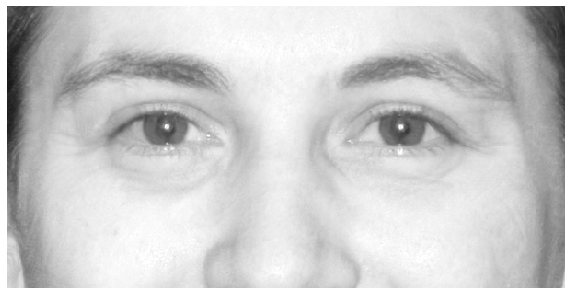

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.axis('off')
plt.imshow(image)

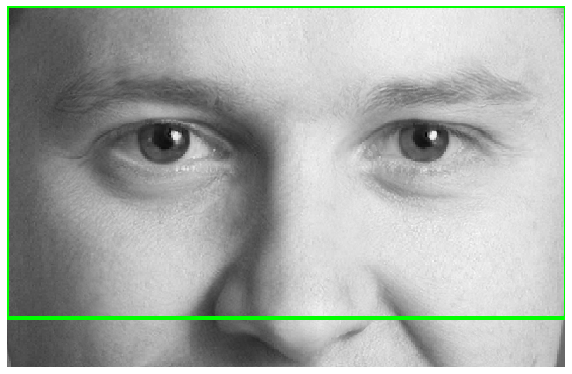

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.axis('off')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [20]:
im = cv2.imread('/home/choppy/TOC/thesis-msc-2022/data/images/aws/bonafide/unmarked/ODAzNjdiO0EyMzI2MDI1.png')/255.
im = np.expand_dims(im, axis=0)
pred1, pred2 = yolo.yolo_model.predict(im)

In [25]:
pred1.shape

(1, 12, 7, 18)

In [26]:
pred2.shape

(1, 24, 14, 18)

In [12]:
os.makedirs('pred_images', exist_ok=True)
list_images = os.listdir('2020-06-10_1103/')
list_images = list(map(lambda x: os.path.join('2020-06-10_1103', x), list_images))
_time = []

for imdir in list_images:
    imname = os.path.basename(imdir)
    image = Image.open(imdir)
    start = time.time()
    out_boxes, out_scores, out_classes = yolo.detect_image(image)
    end = time.time()
    _time.append(end-start)
    image = cv2.imread(imdir)
    for i, c in reversed(list(enumerate(out_classes))):
        box = out_boxes[i]
        score = out_scores[i]
        predicted_class = yolo.class_names[c]

        top, left, bottom, right = box
        top = max(0, np.floor(top + 0.5).astype('int32'))
        left = max(0, np.floor(left + 0.5).astype('int32'))
        bottom = min(image.shape[0], np.floor(bottom + 0.5).astype('int32'))
        right = min(image.shape[1], np.floor(right + 0.5).astype('int32'))
        
        image = cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)
    cv2.imwrite(os.path.join('pred_images', imname), image)
        

In [13]:
print(np.mean(_time))

0.027125012874603272


In [15]:
print(np.sum(_time))

2.712501287460327


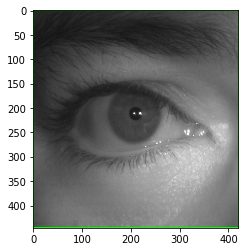

In [14]:
plt.imshow(image[top:bottom, left:right])